In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
def discriminant_function(mean, variance, prior_prob, x):
    """
    Calculate the quadratic coefficients and discriminant value for a given class.
    """
    std_dev = math.sqrt(variance) 
    
    log_term = -0.5 * math.log(2 * math.pi)
    variance_term = -math.log(std_dev)
    distance_term = -((x - mean) ** 2) / (2 * variance)
    
    discriminant_value = log_term + variance_term + distance_term
    
    x2 = -1 / (2 * variance) 
    x1 = mean / variance     
    x0 = (-(mean ** 2) / (2 * variance) + log_term + variance_term + math.log(prior_prob))
    coefficients = np.array([x2, x1, x0])
    
    return coefficients, discriminant_value

In [6]:
def gaussian_pdf(mean, variance, x):
    """
    Calculate the probability density function of a Gaussian distribution.
    """
    std_dev = math.sqrt(variance)
    normalization = 1 / (math.sqrt(2 * math.pi) * std_dev)
    exponent_term = -((x - mean) ** 2) / (2 * variance)
    
    pdf_value = normalization * np.exp(exponent_term)
    return pdf_value

## Prepare the Pdfs for the two classes

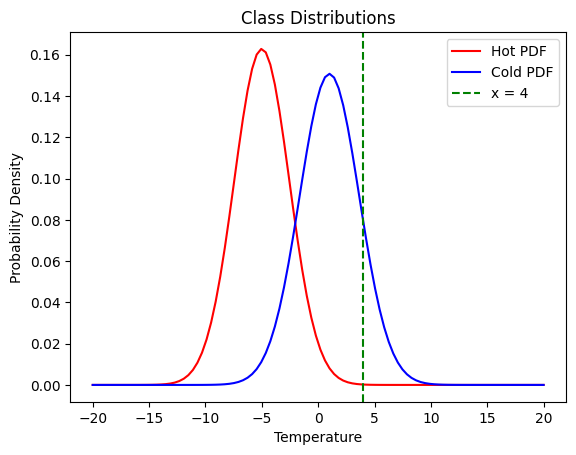

In [17]:
mean_hot, variance_hot, prior_hot = -5,6,0.5  
mean_cold, variance_cold, prior_cold = 1,7,0.5  

x = 4

x_values = np.linspace(-20, 20, 100)
pdf_hot = [gaussian_pdf(mean_hot, variance_hot, x) for x in x_values]
pdf_cold = [gaussian_pdf(mean_cold, variance_cold, x) for x in x_values]

plt.plot(x_values, pdf_hot, label="Hot PDF", color="red")
plt.plot(x_values, pdf_cold, label="Cold PDF", color="blue")
plt.axvline(x=x, color="green", linestyle="--", label=f"x = {x}")
plt.title("Class Distributions")
plt.xlabel("Temperature")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Classify the input

In [18]:

coeff_hot, g_hot = discriminant_function(mean_hot, variance_hot, prior_hot, x)
coeff_cold, g_cold = discriminant_function(mean_cold, variance_cold, prior_cold, x)

print(f"Discriminant for 'Hot': {g_hot}")
print(f"Discriminant for 'Cold': {g_cold}")

if g_hot > g_cold:
    print(f"The temperature {x} is classified as 'Hot'.")
else:
    print(f"The temperature {x} is classified as 'Cold'.")



Discriminant for 'Hot': -8.5648182678187
Discriminant for 'Cold': -2.534750750589472
The temperature 4 is classified as 'Cold'.
